In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
import tensorflow as tf
from keras.metrics import Precision, Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import confusion_matrix


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(train_images.shape)

In [ ]:
to_binary_train_label = to_categorical(train_labels)

## New Model Creation

In [ ]:

model = Sequential(name="mnist")
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu", name="Hidden-2"))
model.add(Dense(32, activation="relu", name="Hidden-3"))
model.add(Dense(10, activation="softmax", name="Output"))
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])


### Convolutional Network below old

In [ ]:


model = Sequential(name="mnist")
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) # becuase number range from 0-9 10 in total
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',Precision(name='precision'), Recall(name='recall')])



### New CNN below

In [ ]:
model = Sequential(name="mnist")
model.add(Conv2D(16, (2, 2), activation='relu', input_shape=(28, 28, 1)))  # Changed (3, 3) to (2, 2)
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (2, 2), activation='relu'))  # Changed (3, 3) to (2, 2) and channels to 32
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))  # Changed (3, 3) to (2, 2) and channels to 64
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])


In [ ]:
history = model.fit(train_images, to_binary_train_label, epochs=5,validation_split=0.2)

In [ ]:
model.evaluate(test_images, to_categorical(test_labels))

In [ ]:
model.save("models/numerical_model_convolutional_2.h5")

## Load a model

In [ ]:
model =tf.keras.models.load_model(
        "models/numerical_model_convolutional.h5"
    ) 

model.summary()

### Test a model

In [ ]:


# Load the image from your local machine
image_path = '/Users/rusab1/Downloads/seven.png'  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to grayscale (if needed) and resize it to 28x28 pixels
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(image)

# Normalize pixel values to be between 0 and 1
#image_array = image_array / 255.0

# Reshape the image to match the input shape expected by the model
image_array = image_array.reshape((1,28, 28))

# Display the image
plt.imshow(image_array.reshape(28, 28), cmap='gray')  # Show the image in grayscale
plt.axis('off')
plt.show()

# Use the trained model to predict on the loaded image
predictions = model.predict(image_array)

# Get the predicted label (digit with highest probability)
predicted_label = predictions.argmax()
#position = int(predicted_label) -1

print(f"Predicted Label: {predicted_label}")


## Confusion matrix

In [56]:
n=1000
predicted_labels = []

In [57]:
for t in test_images[0:n]:
    image_array = t

    # Reshape the image to match the input shape expected by the model
    image_array = image_array.reshape((1,28, 28))

    # Display the image
    # plt.imshow(image_array.reshape(28, 28), cmap='gray')  # Show the image in grayscale
    # plt.axis('off')
    # plt.show()

    # Use the trained model to predict on the loaded image
    predictions = model.predict(image_array)

    # Get the predicted label (digit with highest probability)
    predicted_label = predictions.argmax()

    #print(predictions)
    predicted_labels.append(predicted_label)

    #print(f"Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 30ms/step


In [58]:
tst = test_labels[0:n]
predicted_labels = np.array(predicted_labels)
predicted_labels.shape, tst.shape

cm = confusion_matrix(predicted_labels, tst)
cm, cm.shape
#test_labels,"in-beteween", predictions


(array([[ 85,   0,   0,   0,   0,   0,   1,   0,   1,   0],
        [  0, 125,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   1, 115,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0, 106,   0,   1,   0,   0,   3,   0],
        [  0,   0,   0,   0, 106,   0,   0,   0,   0,   0],
        [  0,   0,   0,   1,   0,  86,   0,   0,   0,   0],
        [  0,   0,   0,   0,   1,   0,  86,   0,   1,   0],
        [  0,   0,   1,   0,   0,   0,   0,  98,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  82,   0],
        [  0,   0,   0,   0,   3,   0,   0,   0,   1,  94]]),
 (10, 10))

In [59]:
desired_number = 8 # Replace this with the number you want to count
#len(test_images)
# Calculate count for the desired number
count_of_desired_number = np.sum(predicted_labels == desired_number)

#print(len(predicted_labels))

print(f"Count of {desired_number}: {count_of_desired_number}")

accuracy = np.trace(cm) / float(np.sum(cm))

print(f"Accuracy: {accuracy:.4f}")

np.trace(cm) #sum of diagonal



Count of 8: 82
Accuracy: 0.9830


983

### plot Confusion matrix

Shape of Confusion Matrix: (10, 10)


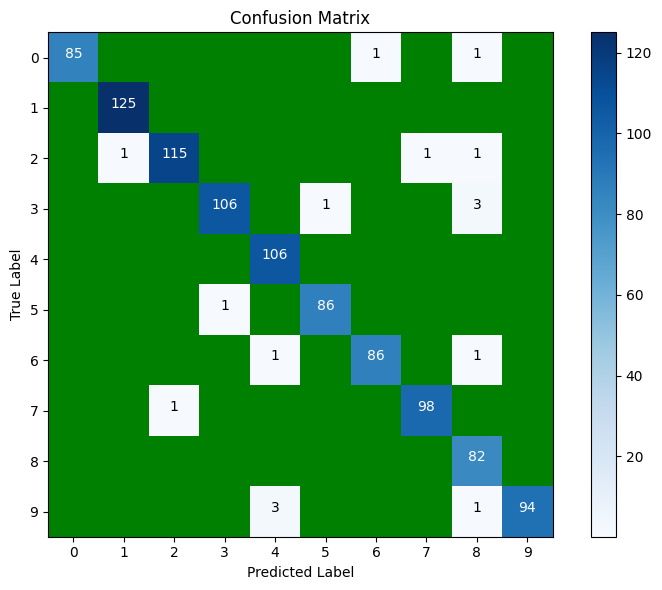

In [60]:
cm = confusion_matrix(predicted_labels, tst)

# Identify misclassifications with counts greater than 1
misclassified_indices = np.where(cm > 0)

# Display the confusion matrix and its shape
# print("Confusion Matrix:")
# print(cm)
print("Shape of Confusion Matrix:", cm.shape)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))

# Define colors for the plot
cmap = plt.cm.Blues
# Set the color for misclassifications
cmap.set_under('green')

plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0.1)
plt.title('Confusion Matrix')
plt.colorbar()

# Adding axis labels 
classes = np.unique(tst)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Adding annotations for misclassifications with counts > 1
thresh = cm.max() / 2.0
for i, j in zip(*misclassified_indices):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


## see mnist data images

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(1, 11):  # Display 10 sample images
    plt.subplot(2, 5, i)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
